In [4]:
import pandas as pd # for data science
import numpy as np  # linear algebra library
import matplotlib.pyplot as plt # plotting library
# import stats functions
from scipy import stats
# normal continuous random variable
from scipy.stats import norm 

In [5]:
# Read in Data file using the URL
retail_data = pd.read_csv('https://archive.ics.uci.edu/static/public/352/data.csv') 
df = pd.DataFrame(retail_data)

In [6]:
# Descriptive Statistics
# Display the first few rows of the DataFrame
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [5]:
# View last few rows
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France


In [8]:
# Check datatypes
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [10]:
# Data Cleaning
# Convert 'InvoiceDate' to datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Add a 'TotalSales' column: Quantity * UnitPrice
df['TotalSales'] = df['Quantity'] * df['UnitPrice']

# Extract only United Kingdom retail data for analysis
uk_data = df[df['Country'] == 'United Kingdom']
uk_data.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales
541889,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09 12:31:00,1.95,15804.0,United Kingdom,23.4
541890,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113.0,United Kingdom,23.6
541891,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,1.25,13113.0,United Kingdom,30.0
541892,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09 12:49:00,8.95,13113.0,United Kingdom,214.8
541893,581586,20685,DOORMAT RED RETROSPOT,10,2011-12-09 12:49:00,7.08,13113.0,United Kingdom,70.8


In [12]:
# Data Analysis
# Sales Analysis
# Dtermine the total Sales
total_sales = uk_data['TotalSales'].sum()
print(f"Total Sales in UK: £{total_sales:.2f}")

# Average Sales per Transaction by invoiceNo
average_sales = uk_data.groupby('InvoiceNo')['TotalSales'].mean().mean()
print(f"Average Sales per Transaction: £{average_sales:.2f}")



Total Sales in UK: £8187806.36
Average Sales per Transaction: £18.77


In [13]:
# determine the top 10 Products by Sales
top_products = uk_data.groupby('Description')['TotalSales'].sum().sort_values(ascending=False).head(10)
print("Top 10 Products by Total Sales:")
print(top_products)

Top 10 Products by Total Sales:
Description
DOTCOM POSTAGE                        206245.48
REGENCY CAKESTAND 3 TIER              134405.94
WHITE HANGING HEART T-LIGHT HOLDER     93953.07
PARTY BUNTING                          92501.73
JUMBO BAG RED RETROSPOT                84516.44
PAPER CHAIN KIT 50'S CHRISTMAS         61888.19
ASSORTED COLOUR BIRD ORNAMENT          54662.15
CHILLI LIGHTS                          52986.86
PICNIC BASKET WICKER 60 PIECES         39619.50
BLACK RECORD COVER FRAME               39387.00
Name: TotalSales, dtype: float64


In [15]:
# Time-Series Analysis
# Total sales by Date (day) ignoring time 
sales_by_date = uk_data.groupby(uk_data['InvoiceDate'].dt.date)['TotalSales'].sum()


The number of different categories is: 4223


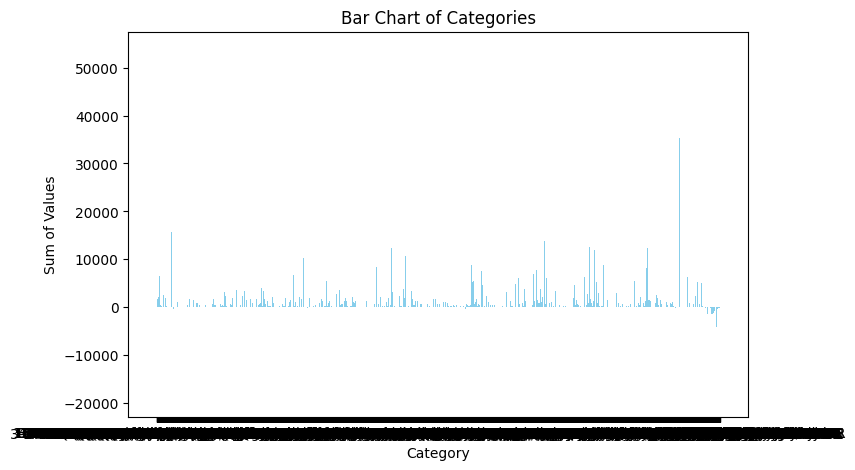

In [17]:
#Exploratory Analysis of additional variables to explore
# Bar chart of quantity of each item
# Group by 'Category' and sum 'Value'
aggregated_data = df.groupby('Description')['Quantity'].sum().reset_index()
aggregated_data['Description'] = aggregated_data['Description'].astype(str)

# Count the number of unique categories
num_categories = aggregated_data['Description'].nunique()

# Print the result
print(f"The number of different categories is: {num_categories}")

#Create a bar chart figure of the dataset
plt.figure(figsize = (8, 5))
plt.bar(aggregated_data['Description'], aggregated_data['Quantity'], color='skyblue')
plt.title('Bar Chart of Categories')
plt.xlabel('Category')
plt.ylabel('Sum of Values')
plt.show()